In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~22.04 [30.8 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~22.04 [8,860 kB]
Fe

In [2]:
# installing hadoop
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-07-24 12:13:51--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  18.5MB/s    in 15s     

2023-07-24 12:14:07 (16.8 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
#unzinpping the folder
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
# installing findspark library
!pip install -q findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [6]:
# locating spark system
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [7]:
# setting the emvoironment
import pyspark
import numpy as np
import pandas as pd

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [9]:
spark

In [10]:
pip install gmplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 1.5 MB/s eta 0:00:00


In [11]:
#importing all the important repositories or libraries
import numpy as np
import pandas as pd
import pyspark.ml.feature
import pyspark.ml.classification
import pyspark.ml.evaluation
import pyspark.sql
import datetime
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from sklearn.metrics import confusion_matrix
from pyspark.ml.classification import NaiveBayes
from geopy.geocoders import Nominatim
import numpy as np
import gmplot
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pyspark



In [12]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import os
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import webbrowser

In [13]:
#clustering
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [14]:
flamingo = spark.read.csv('/content/drive/MyDrive/Big Data Management/datasets/flamingo-data/game-clicks.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

flamingo.show(5)

+--------------+-------+---------+----------+-----+
|     timestamp|clickId|teamLevel|count_hits|isHit|
+--------------+-------+---------+----------+-----+
|6/16/2016 8:11| 750154|        8|         8|    0|
|6/16/2016 8:11| 750503|        7|         5|    0|
|6/16/2016 8:11| 750692|        6|         2|    0|
|6/16/2016 8:11| 750788|        4|         4|    0|
|6/16/2016 8:11| 750133|        8|         0|    0|
+--------------+-------+---------+----------+-----+
only showing top 5 rows



In [15]:
# Remove the useless features
flamingo1 = flamingo.drop('clickId')
flamingo2 = flamingo1.drop('timestamp')

flamingo2.show()

+---------+----------+-----+
|teamLevel|count_hits|isHit|
+---------+----------+-----+
|        8|         8|    0|
|        7|         5|    0|
|        6|         2|    0|
|        4|         4|    0|
|        8|         0|    0|
|        7|         5|    0|
|        8|         5|    0|
|        1|         8|    0|
|        5|         6|    0|
|        8|         9|    0|
|        8|         6|    0|
|        7|         9|    1|
|        8|         6|    0|
|        8|        14|    0|
|        8|         7|    0|
|        8|         8|    0|
|        7|        21|    0|
|        8|         4|    0|
|        5|        10|    0|
|        8|         2|    0|
+---------+----------+-----+
only showing top 20 rows



In [16]:
from pyspark.sql.functions import round


# Create 'label' column indicating it is a hit (1) or not(0)
flamingo2 = flamingo2.withColumn('label', (flamingo2.isHit >= 1).cast('integer'))

flamingo3 = flamingo2.drop('isHit')

# Check first five records
flamingo3.show(5)

+---------+----------+-----+
|teamLevel|count_hits|label|
+---------+----------+-----+
|        8|         8|    0|
|        7|         5|    0|
|        6|         2|    0|
|        4|         4|    0|
|        8|         0|    0|
+---------+----------+-----+
only showing top 5 rows



In [17]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
assembler = VectorAssembler(inputCols=[
    'teamLevel', 'count_hits',
], outputCol='features')

# Consolidate predictor columns
flamingo_assembled = assembler.transform(flamingo3)

# Check the resulting column
flamingo_assembled.show(5, truncate=False)

+---------+----------+-----+---------+
|teamLevel|count_hits|label|features |
+---------+----------+-----+---------+
|8        |8         |0    |[8.0,8.0]|
|7        |5         |0    |[7.0,5.0]|
|6        |2         |0    |[6.0,2.0]|
|4        |4         |0    |[4.0,4.0]|
|8        |0         |0    |[8.0,0.0]|
+---------+----------+-----+---------+
only showing top 5 rows



In [18]:
flamingo3.show(5)

+---------+----------+-----+
|teamLevel|count_hits|label|
+---------+----------+-----+
|        8|         8|    0|
|        7|         5|    0|
|        6|         2|    0|
|        4|         4|    0|
|        8|         0|    0|
+---------+----------+-----+
only showing top 5 rows



In [19]:
def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())

    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
	wsseList = []
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [20]:
#Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
featuresUsed = ['teamLevel','count_hits','label']
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled = assembler.transform(flamingo3)

In [21]:
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)

In [22]:
scaledData = scaledData.select("features", "label")

elbowset = scaledData.filter((scaledData.label % 3) == 0).select("features")
elbowset.persist()

DataFrame[features: vector]

In [23]:
clusters = range(2,31)

wsseList = elbow(elbowset, clusters)

Training for cluster size 2 
......................WSSE = 2691.8803302554215 
Training for cluster size 3 
......................WSSE = 2142.5066737439856 
Training for cluster size 4 
......................WSSE = 1832.4379267768818 
Training for cluster size 5 
......................WSSE = 1644.028837618293 
Training for cluster size 6 
......................WSSE = 1481.2012835836508 
Training for cluster size 7 
......................WSSE = 1374.084877478614 
Training for cluster size 8 
......................WSSE = 1314.0853791961677 
Training for cluster size 9 
......................WSSE = 1254.2171959136222 
Training for cluster size 10 
......................WSSE = 1147.4804650473468 
Training for cluster size 11 
......................WSSE = 1059.5790675195567 
Training for cluster size 12 
......................WSSE = 982.1191367426304 
Training for cluster size 13 
......................WSSE = 952.4054232832599 
Training for cluster size 14 
......................WSSE = 893.8

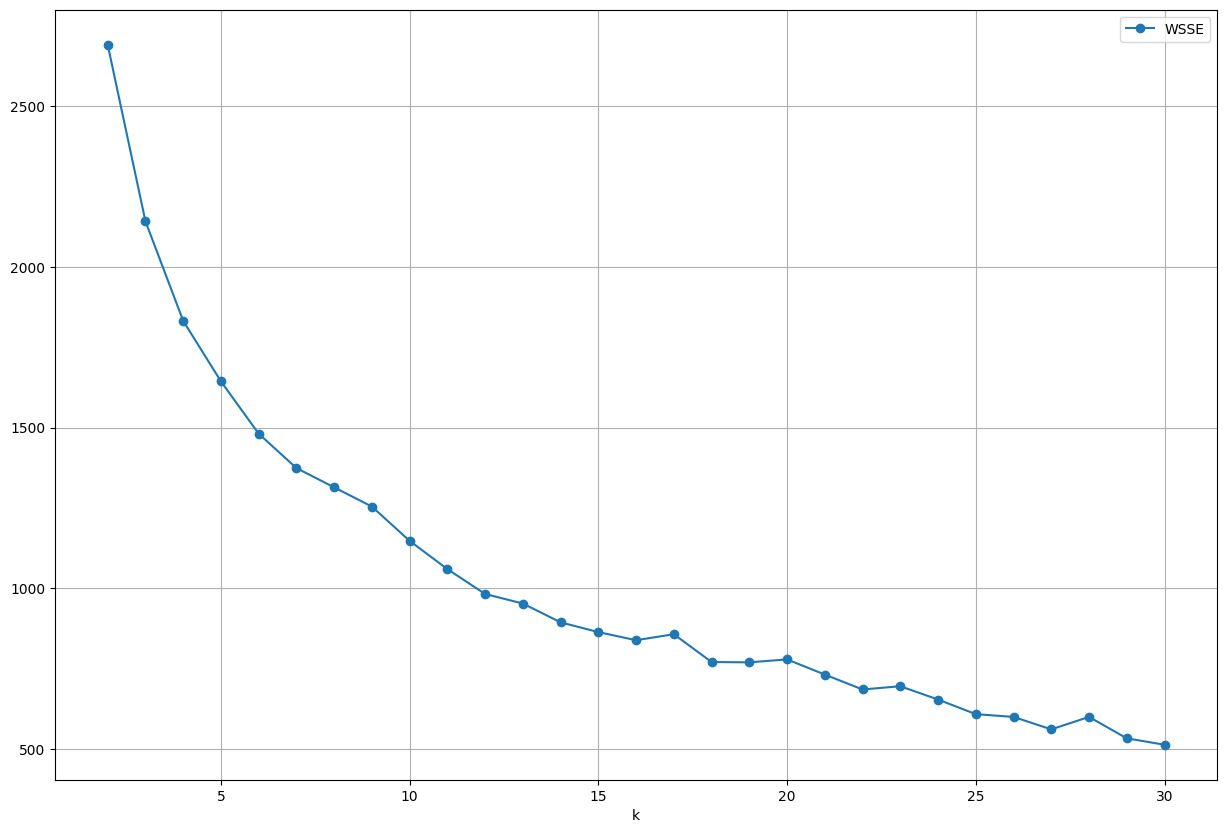

In [24]:
elbow_plot(wsseList, clusters)

In [25]:
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(elbowset)
transformed = model.transform(elbowset)

In [26]:
## GET CENTERIODS
centers = model.clusterCenters()
centers


P = pd_centers(featuresUsed, centers)

P.head()

,teamLevel,count_hits,label,prediction
0,-1.504636,-0.199601,-0.338188,0
1,0.499824,-0.277912,-0.338188,1
2,0.092923,2.456013,-0.338188,2


In [27]:

transformed.show()
centers

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.76925729084672...|         1|
|[0.24741582700753...|         1|
|[-0.2744256368316...|         1|
|[-1.3181085645100...|         0|
|[0.76925729084672...|         1|
|[0.24741582700753...|         1|
|[0.76925729084672...|         1|
|[-2.8836329560275...|         0|
|[-0.7962671006708...|         0|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
|[0.24741582700753...|         1|
|[0.76925729084672...|         1|
|[-0.7962671006708...|         0|
|[0.76925729084672...|         1|
|[0.76925729084672...|         1|
+--------------------+----------+
only showing top 20 rows



[array([-1.50463604, -0.19960138, -0.33818836]),
 array([ 0.49982425, -0.27791242, -0.33818836]),
 array([ 0.09292329,  2.45601261, -0.33818836])]

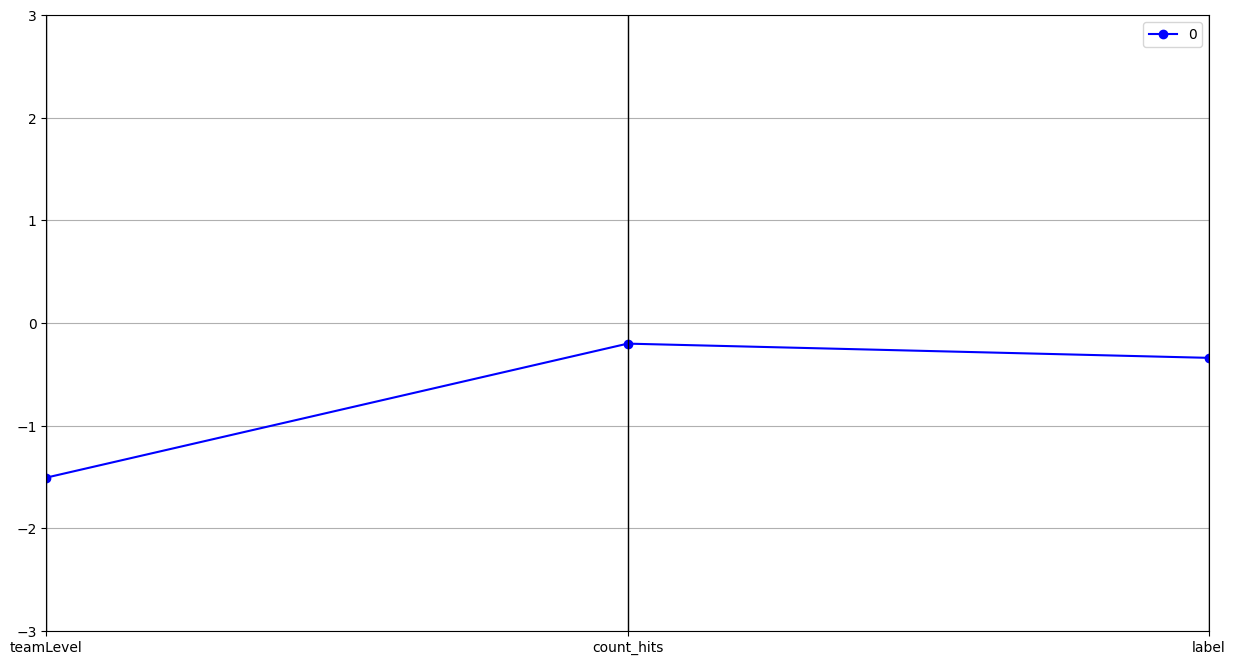

In [28]:
parallel_plot(P[P['teamLevel'] < -0.5], P)